In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [92]:
warnings.filterwarnings('ignore')

In [93]:
df=pd.read_csv('DaiquirisSalesData_train.csv')

In [94]:
df.sample(5)

,Date,Order_Type,Payment_Type,Flavors,Extra_Shots,Candy_Toppings,Drink_Size,Total_Cost,Month
102,2023-06-01,In-store,Cash,Island Pina Colada,0,0,32 oz,18.0,June
20,2023-01-02,In-store,Card,"Island Mary-Jane, Island Hurricane",2,0,32 oz,17.0,January
95,2023-02-15,DoorDash,Card,"Island Peach, Island Strawberry",0,0,32 oz,18.0,February
1,2023-03-05,DoorDash,Card,"Island Hypnotical, Island Rita",1,0,24 oz,14.0,March
45,2023-01-15,DoorDash,Card,"Island Pina Colada, Island Rita",1,0,16 oz,9.0,January


In [95]:
df.shape

(116, 9)

In [96]:
df.describe(include='all')

,Date,Order_Type,Payment_Type,Flavors,Extra_Shots,Candy_Toppings,Drink_Size,Total_Cost,Month
count,116,116,116,116,116.000000,116.000000,116,116.000000,116
unique,36,2,2,47,NaN,NaN,3,NaN,12
top,2023-12-01,In-store,Cash,Island Pina Colada,NaN,NaN,32 oz,NaN,March
freq,5,58,58,8,NaN,NaN,42,NaN,10
mean,NaN,NaN,NaN,NaN,1.362069,0.612069,NaN,14.310345,NaN
std,NaN,NaN,NaN,NaN,1.066457,0.489393,NaN,3.505062,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,7.000000,NaN
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,11.000000,NaN
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,15.000000,NaN
75%,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,18.000000,NaN


In [97]:
df.isnull().sum()

Date              0
Order_Type        0
Payment_Type      0
Flavors           0
Extra_Shots       0
Candy_Toppings    0
Drink_Size        0
Total_Cost        0
Month             0
dtype: int64

In [98]:
df.duplicated().any()

True

In [99]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            116 non-null    object 
 1   Order_Type      116 non-null    object 
 2   Payment_Type    116 non-null    object 
 3   Flavors         116 non-null    object 
 4   Extra_Shots     116 non-null    int64  
 5   Candy_Toppings  116 non-null    int64  
 6   Drink_Size      116 non-null    object 
 7   Total_Cost      116 non-null    float64
 8   Month           116 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 8.3+ KB
None


In [100]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [101]:
df['Date']

0     2023-03-01
1     2023-03-05
2     2023-04-02
3     2023-04-15
4     2023-05-03
         ...    
111   2023-10-18
112   2023-11-01
113   2023-11-15
114   2023-12-01
115   2023-12-18
Name: Date, Length: 116, dtype: datetime64[ns]

In [102]:
# Extract month and year from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

In [103]:
df['YearMonth']

0      2023-03
1      2023-03
2      2023-04
3      2023-04
4      2023-05
        ...   
111    2023-10
112    2023-11
113    2023-11
114    2023-12
115    2023-12
Name: YearMonth, Length: 116, dtype: period[M]

In [104]:
# Calculate total sales for each month
monthly_sales = df.groupby('YearMonth')['Total_Cost'].sum()

In [105]:
# Display total sales for each month
print("Total Sales for Each Month:")
print(monthly_sales)

Total Sales for Each Month:
YearMonth
2023-01    101.0
2023-02    126.0
2023-03    128.0
2023-04    162.0
2023-05    132.0
2023-06    138.0
2023-07    163.0
2023-08    134.0
2023-09    136.0
2023-10    165.0
2023-11    134.0
2023-12    141.0
Freq: M, Name: Total_Cost, dtype: float64


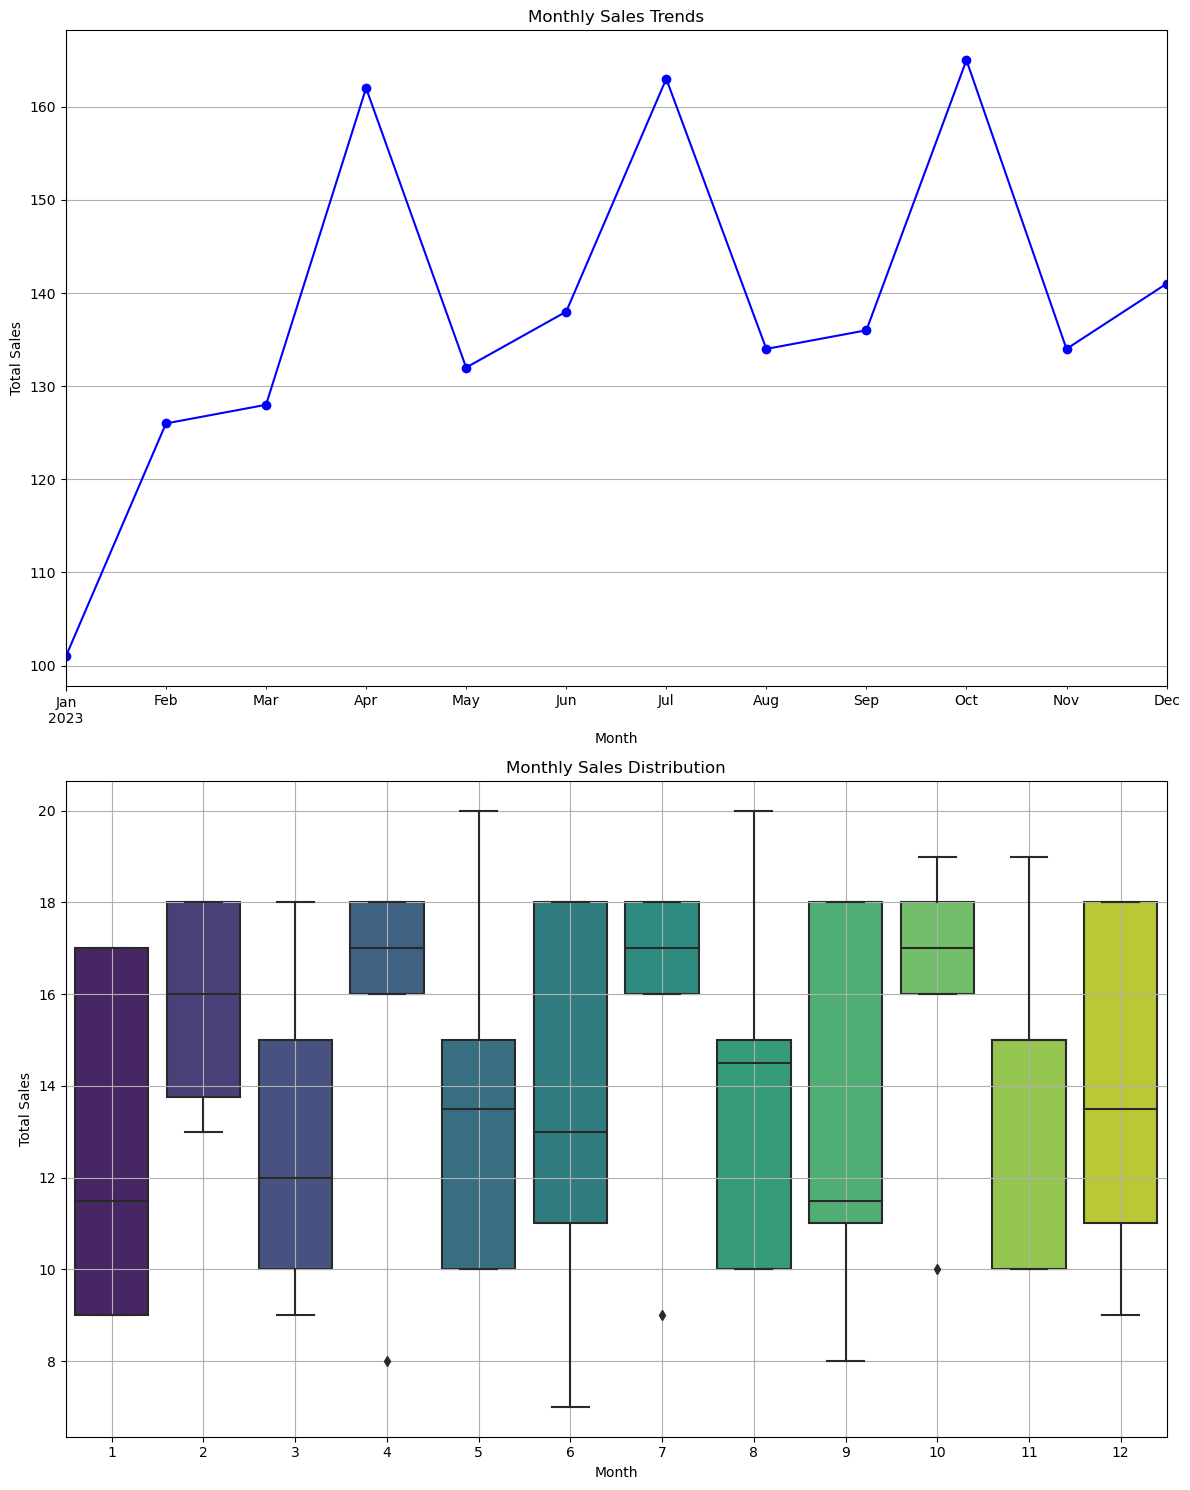

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 15))

# Plot Monthly Sales Trends
monthly_sales.plot(kind='line', marker='o', ax=ax1, color='b')
ax1.set_title('Monthly Sales Trends')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales')
ax1.grid(True)

# Identify peak sales periods and seasons
sns.boxplot(x=df['Date'].dt.month, y='Total_Cost', data=df, ax=ax2, palette='viridis')
ax2.set_title('Monthly Sales Distribution')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Sales')
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [107]:
# Explore sales distribution across different dimensions
print("\nSales Distribution:")
print("1. By Drink Size:")
print(df.groupby('Drink_Size')['Total_Cost'].sum())


Sales Distribution:
1. By Drink Size:
Drink_Size
16 oz    387.0
24 oz    524.0
32 oz    749.0
Name: Total_Cost, dtype: float64


In [108]:
print("\n2. By Order Type:")
print(df.groupby('Order_Type')['Total_Cost'].sum())

print("\n3. By Payment Type:")
print(df.groupby('Payment_Type')['Total_Cost'].sum())


2. By Order Type:
Order_Type
DoorDash    832.0
In-store    828.0
Name: Total_Cost, dtype: float64

3. By Payment Type:
Payment_Type
Card    853.0
Cash    807.0
Name: Total_Cost, dtype: float64


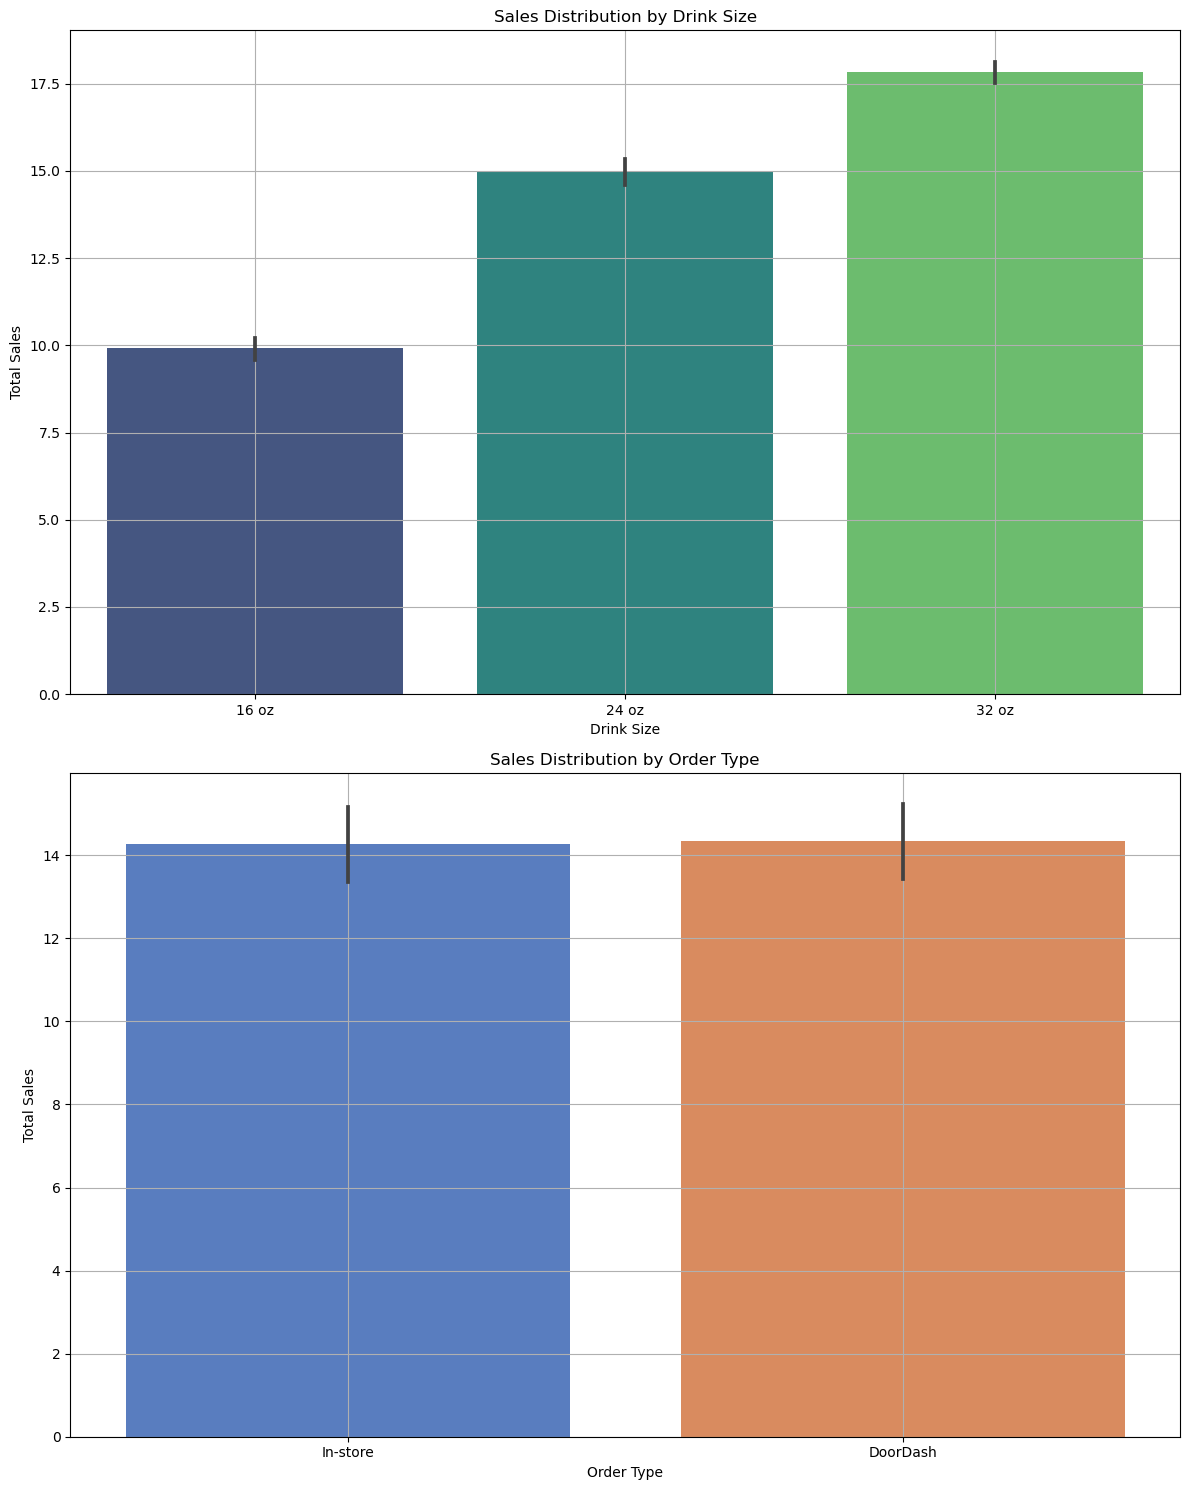

In [109]:
# Set up the figure and axes for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 15))

# Explore sales distribution across different dimensions

# Plot Sales Distribution by Drink Size
sns.barplot(x='Drink_Size', y='Total_Cost', data=df, ax=ax1, palette='viridis')
ax1.set_title('Sales Distribution by Drink Size')
ax1.set_xlabel('Drink Size')
ax1.set_ylabel('Total Sales')
ax1.grid(True)

# Plot Sales Distribution by Order Type
sns.barplot(x='Order_Type', y='Total_Cost', data=df, ax=ax2, palette='muted')
ax2.set_title('Sales Distribution by Order Type')
ax2.set_xlabel('Order Type')
ax2.set_ylabel('Total Sales')
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

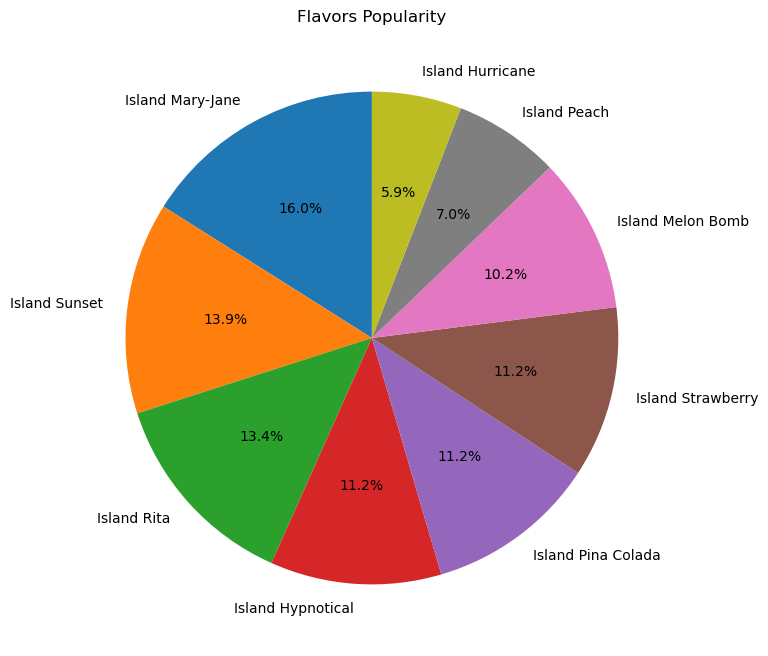

In [116]:
# Analyze the popularity of different flavors
flavor_counts = df['Flavors'].str.split(', ', expand=True).stack().value_counts()

# Plot pie chart for Flavors Popularity
plt.figure(figsize=(8, 8))
plt.pie(flavor_counts, labels=flavor_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Flavors Popularity')
plt.show()


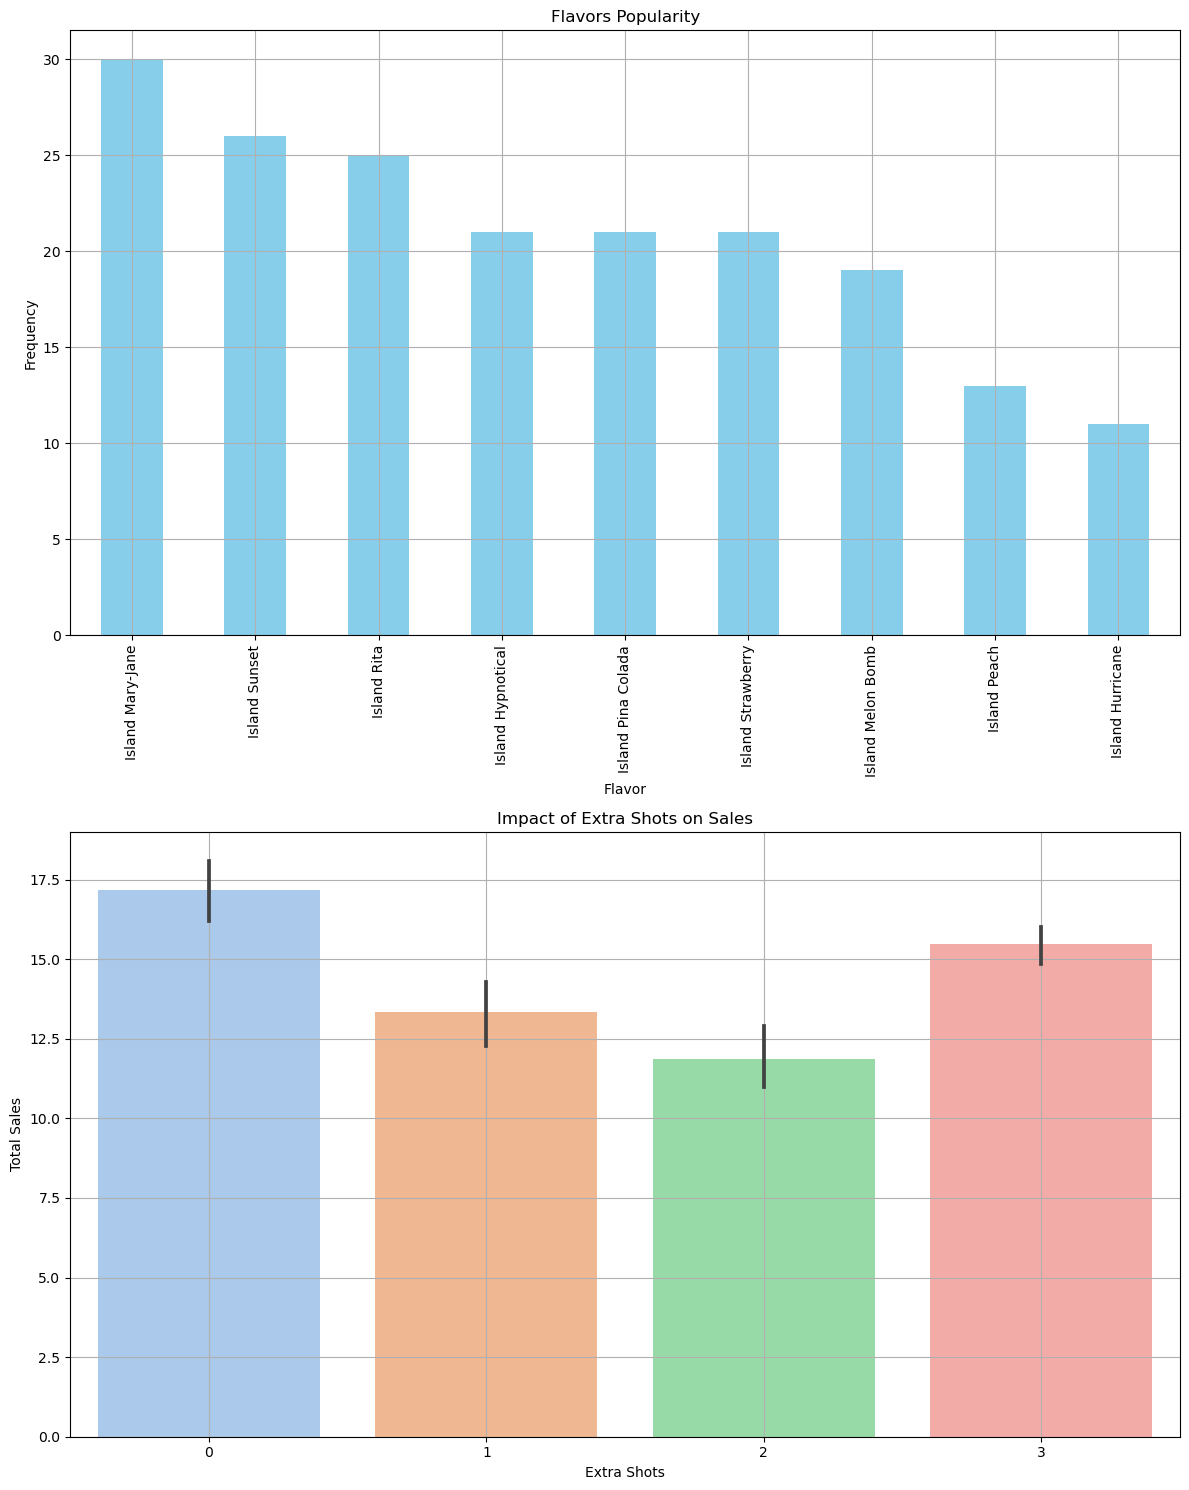

In [110]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Analyze the popularity of different flavors
flavor_counts = df['Flavors'].str.split(', ', expand=True).stack().value_counts()

# Set up the figure and axes for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 15))

# Plot Flavors Popularity
flavor_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Flavors Popularity')
ax1.set_xlabel('Flavor')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Explore the impact of extra shots on sales and popularity
sns.barplot(x='Extra_Shots', y='Total_Cost', data=df, ax=ax2, palette='pastel')
ax2.set_title('Impact of Extra Shots on Sales')
ax2.set_xlabel('Extra Shots')
ax2.set_ylabel('Total Sales')
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

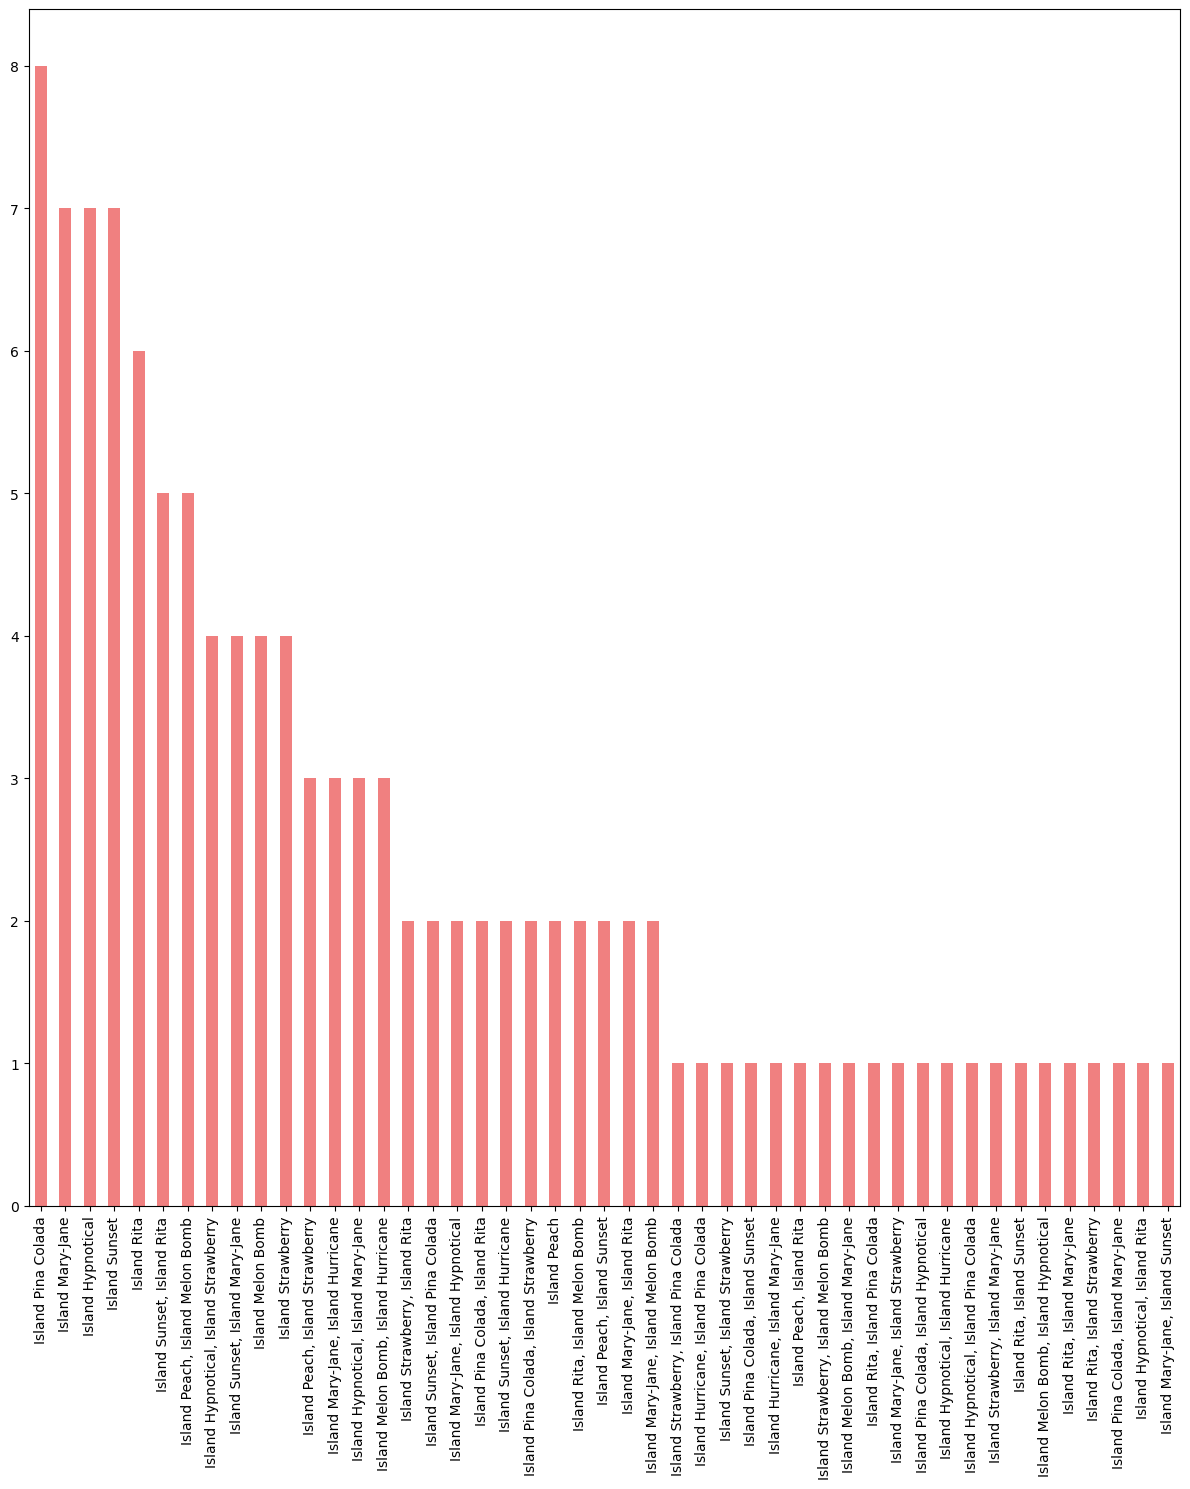

In [111]:

# Set up the figure and axes for plotting
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 15))

# Analyze combinations of flavors that customers prefer
flavor_combinations = flavors_df.apply(lambda row: ', '.join(row.dropna()), axis=1)
combination_counts = flavor_combinations.value_counts()

# Plot Flavor Combinations Preference
combination_counts.plot(kind='bar', ax=ax1, color='lightcoral')
ax2.set_title('Flavor Combinations Preference')
ax2.set_xlabel('Flavor Combinations')
ax2.set_ylabel('Frequency')
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


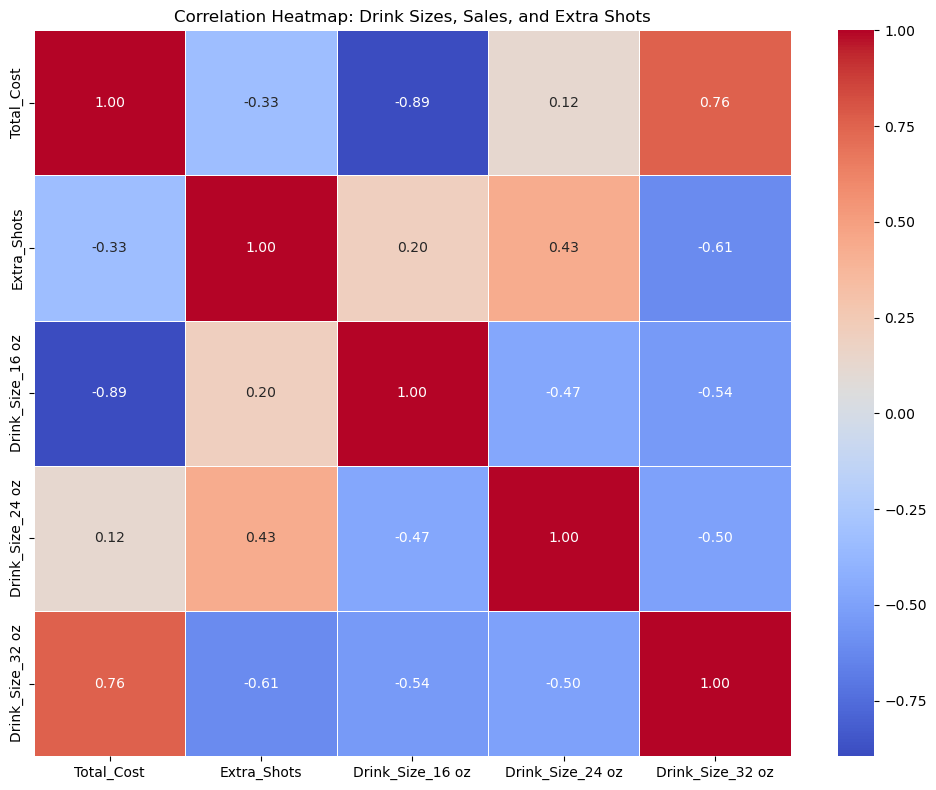

In [112]:
# Convert 'Drink_Size' to a categorical variable for better visualization
df['Drink_Size'] = pd.Categorical(df['Drink_Size'], categories=['16 oz', '24 oz', '32 oz'], ordered=True)

# One-hot encode 'Drink_Size'
one_hot_drink_size = pd.get_dummies(df['Drink_Size'], prefix='Drink_Size')

# Concatenate one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_drink_size], axis=1)

# Create a DataFrame with relevant columns for correlation heatmap
correlation_df = df[['Total_Cost', 'Extra_Shots', 'Drink_Size_16 oz', 'Drink_Size_24 oz', 'Drink_Size_32 oz']]

# Set up the figure and axes for plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Create a correlation heatmap
correlation_matrix = correlation_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax, fmt=".2f", linewidths=.5)
ax.set_title('Correlation Heatmap: Drink Sizes, Sales, and Extra Shots')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [113]:
# Calculate the correlation between the number of extra shots and the total cost
correlation_extra_shots_total_cost = df['Extra_Shots'].corr(df['Total_Cost'])

print(f"Correlation between Extra Shots and Total Cost: {correlation_extra_shots_total_cost:.2f}")

Correlation between Extra Shots and Total Cost: -0.33


In [117]:
# Calculate total sales for each month
monthly_sales = df.groupby('YearMonth')['Total_Cost'].sum()

# 1. Monthly Sales Trends
print("1. Monthly Sales Trends:")
print(monthly_sales)

# 2. Sales Distribution Across Different Dimensions
print("\n2. Sales Distribution Across Different Dimensions:")
print("Drink Size Distribution:")
print(df['Drink_Size'].value_counts())
print("\nOrder Type Distribution:")
print(df['Order_Type'].value_counts())
print("\nPayment Type Distribution:")
print(df['Payment_Type'].value_counts())

# 3. Flavors and Extra Shots Analysis
flavor_counts = df['Flavors'].str.split(', ', expand=True).stack().value_counts()
print("\n3. Flavors Popularity:")
print(flavor_counts)
print("\nImpact of Extra Shots on Sales:")
print(df.groupby('Extra_Shots')['Total_Cost'].mean())

# 4. Flavor Popularity Analysis
flavors_df = df['Flavors'].str.split(', ', expand=True)
print("\n4. Most Popular Flavors:")
print(flavors_df.stack().value_counts().head())
print("\nFlavor Combinations Preference:")
print(flavors_df.apply(lambda row: ', '.join(row.dropna()), axis=1).value_counts().head())

# 5. Sales Trend Analysis
print("\n5. Monthly Sales Distribution:")
print(df.groupby(df['Date'].dt.month)['Total_Cost'].mean())

# 6. Correlation Analysis
correlation_extra_shots_total_cost = df['Extra_Shots'].corr(df['Total_Cost'])
print("\n6. Correlation Between Extra Shots and Total Cost:")
print(f"Correlation Coefficient: {correlation_extra_shots_total_cost:.2f}")

1. Monthly Sales Trends:
YearMonth
2023-01    101.0
2023-02    126.0
2023-03    128.0
2023-04    162.0
2023-05    132.0
2023-06    138.0
2023-07    163.0
2023-08    134.0
2023-09    136.0
2023-10    165.0
2023-11    134.0
2023-12    141.0
Freq: M, Name: Total_Cost, dtype: float64

2. Sales Distribution Across Different Dimensions:
Drink Size Distribution:
Drink_Size
32 oz    42
16 oz    39
24 oz    35
Name: count, dtype: int64

Order Type Distribution:
Order_Type
In-store    58
DoorDash    58
Name: count, dtype: int64

Payment Type Distribution:
Payment_Type
Cash    58
Card    58
Name: count, dtype: int64

3. Flavors Popularity:
Island Mary-Jane      30
Island Sunset         26
Island Rita           25
Island Hypnotical     21
Island Pina Colada    21
Island Strawberry     21
Island Melon Bomb     19
Island Peach          13
Island Hurricane      11
Name: count, dtype: int64

Impact of Extra Shots on Sales:
Extra_Shots
0    17.181818
1    13.333333
2    11.864865
3    15.473684
Name: T

In [119]:
# Convert 'Drink_Size' to a categorical variable for better visualization
df['Drink_Size'] = pd.Categorical(df['Drink_Size'], categories=['16 oz', '24 oz', '32 oz'], ordered=True)

# Calculate the correlation between drink sizes and total sales
correlation_drink_size_sales = df.groupby('Drink_Size')['Total_Cost'].corr(df['Total_Cost'])

# Print the correlation coefficients
print("Correlation Between Drink Sizes and Sales:")
print(correlation_drink_size_sales)

Correlation Between Drink Sizes and Sales:
Drink_Size
16 oz    1.0
24 oz    1.0
32 oz    1.0
Name: Total_Cost, dtype: float64


In [129]:
# Split the 'Flavors' column to analyze individual flavors
flavors_df = df['Flavors'].str.split(', ', expand=True)

# Convert 'Drink_Size' to a categorical variable for better visualization
df['Drink_Size'] = pd.Categorical(df['Drink_Size'], categories=['16 oz', '24 oz', '32 oz', '1/2 gallon'], ordered=True)

# Concatenate one-hot encoded columns with the original DataFrame
df = pd.concat([df, flavors_df], axis=1)

# Create a list of flavors and extra shots
flavor_columns = flavors_df.columns
extra_shots_columns = ['Extra_Shots']

# Calculate the correlation between flavors and extra shots
correlation_flavors_extra_shots = df.groupby(flavor_columns)[extra_shots_columns].corr().groupby(level=0).mean()

# Print the correlation coefficients
print("Correlation Between Flavors and Extra Shots:")
print(correlation_flavors_extra_shots)

ValueError: Grouper and axis must be same length